# MELODIES-MONET example with MOPITT CO

First lets just import the driver

In [1]:
import sys
sys.path.append('../../')
import driver

Please install s3fs if retrieving from the Amazon S3 Servers.  Otherwise continue with local data
Please install h5netcdf to open files from the Amazon S3 servers.


### Driver class

First, we initialize the python driver analysis class. It consists of 3 main components/processes; 1. model instances, 2. observation instances, 3. a paired instance of both.  This helps us set up the comparisons.

In [2]:
an = driver.analysis()

### Control File

Read in all the comparison definitions from the yaml control file.

In [3]:
an.control = '../yaml/control_mopitt.yaml'
an.read_control()
#an.control_dict
#an.control_dict['obs']['mopitt_l3']

### Open Obs

Load all the data files. Satellites data is usually hdf or netCDF, although sometimes are saved as ascii or other unusual formats. Note the data needs to be already accessible on the system you are working on. Future functionality will include OpenDap. 

In [4]:
an.open_obs()

Reading MOPITT
/glade/work/buchholz/data/MOPITT/MOP03JM-202008-L3V95.9.3.he5
/glade/work/buchholz/data/MOPITT/MOP03JM-202009-L3V95.9.3.he5
/glade/work/buchholz/data/MOPITT/MOP03JM-202010-L3V95.9.3.he5


We can look at the data we just loaded based on the observation names defined in the yaml dictionary.

In [5]:
#All the info in the observation class can also be called.
an.obs['mopitt_l3'].obj


<xarray.Dataset>
Dimensions:  (time: 3, lon: 360, lat: 180)
Coordinates:
  * time     (time) datetime64[ns] 2020-08-01T00:00:11.125999872 ... 2020-10-...
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Data variables:
    column   (time, lon, lat) float32 nan nan nan nan nan ... nan nan nan nan

### Test plotting


In [6]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs                 # For plotting maps
import cartopy.feature as cfeature         # For plotting maps
from cartopy.util import add_cyclic_point  # For plotting maps
import numpy as np

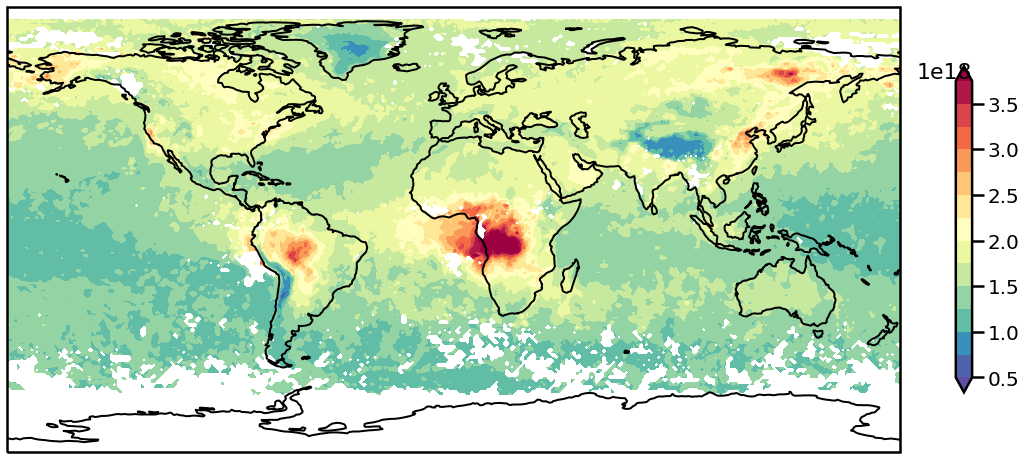

In [7]:
plt.figure(figsize=(20,10))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)

clev = np.arange(0.5*1e18, 3.8*1e18, 0.25*1e18)
plt.contourf(an.obs['mopitt_l3'].obj.lon,an.obs['mopitt_l3'].obj.lat,an.obs['mopitt_l3'].obj.column[0,:,:].transpose(), clev, cmap='Spectral_r',extend='both')

cbar = plt.colorbar(shrink=0.6)
cbar.ax.tick_params(labelsize=20) 

#plt.show()
plt.savefig('mopitt_example.png')